In [32]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio
import h5py

In [12]:
from scipy.sparse import csr_matrix

def convert_sparse(a):
    output = np.zeros(shape=(3, a.size), dtype=np.uint32)
    # index
    output[0] = ((a >> 16) & (2 ** 21 - 1)).astype(np.uint32)
    # frame
    output[1] = (a >> 40).astype(np.uint32)
    # count
    output[2] = (a & (2 ** 12 - 1)).astype(np.uint8)
    return output


def read_rigaku_dataset(fname):
    with open(fname, 'r') as f:
        a = np.fromfile(f, dtype=np.uint64)
        d = convert_sparse(a)
        index, frame, count = d[0], d[1], d[2]
    num_frames = frame[-1] + 1
    dset = csr_matrix((count, (frame, index)), shape=(num_frames, 512 * 1024))
    return dset

In [13]:
dset = read_rigaku_dataset('/data/xpcs8/2021-2/babnigg202107_2/I026_D100_2mmCap_250C10p_att01_Rq0_00001/I026_D100_2mmCap_250C10p_att01_Rq0_00001.bin')

In [37]:
dset_sum = np.array(dset.sum(axis=0))

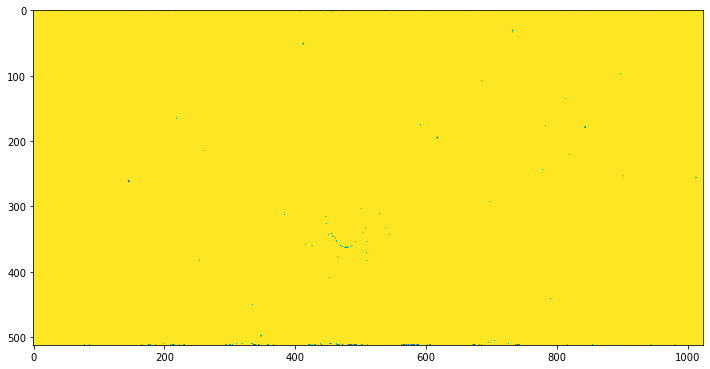

In [33]:
with h5py.File('qmap_for_mask') as f:
    mask = f['/data/mask'][()]
plt.imshow(mask)

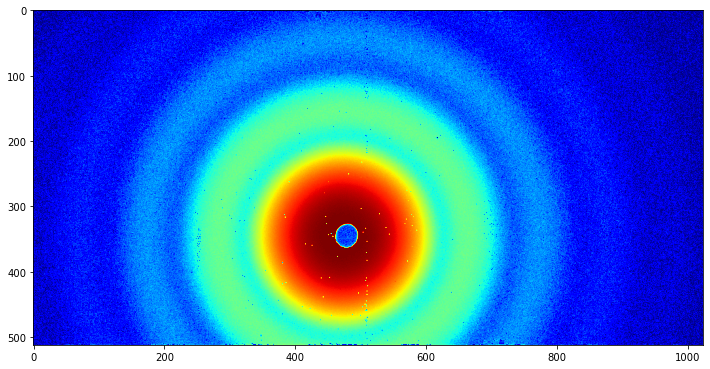

In [57]:
plt.imshow(np.log10(dset_sum.reshape(512, 1024) + 1) * mask, vmin=0, vmax=3.8, cmap=plt.cm.jet)
# plt.colorbar()
plt.savefig('figure1_frame_averaged_saxs.png', dpi=1200)

In [27]:
dset[0].todense().reshape(512, 1024)

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [39]:
for n in range(10):
    x = np.array(dset[n].todense().reshape(512, 1024)) * mask
    skio.imsave(f'slice_{n:03d}.tif', x)

/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_000.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_001.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_002.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_003.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_004.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_005.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_006.tif is a low contrast image
  skio.imsave(f'slice_{n:03d}.tif', x)
/tmp/ipykernel_3151820/1487043476.py:3: UserWarning: slice_007.tif is a low contrast image

In [40]:
!ls

figure1.ipynb  slice_001.tif  slice_004.tif  slice_007.tif
qmap_for_mask  slice_002.tif  slice_005.tif  slice_008.tif
slice_000.tif  slice_003.tif  slice_006.tif  slice_009.tif


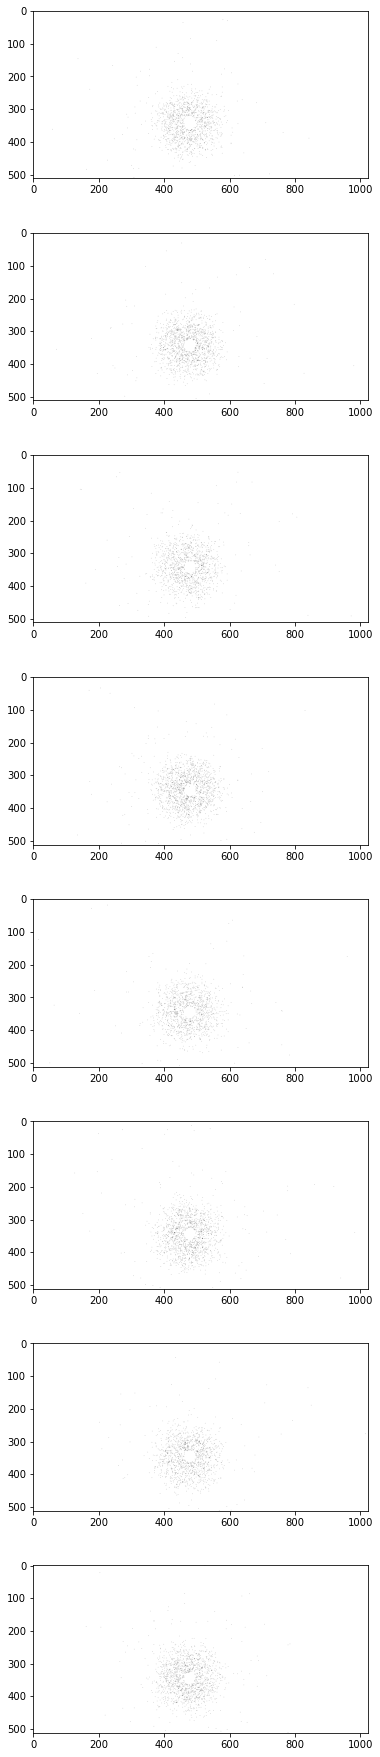

In [47]:
num_imgs = 8
fig, ax = plt.subplots(num_imgs, 1, figsize=(6, num_imgs*4))
for n in range(num_imgs):
    x = skio.imread(f'slice_{n:03d}.tif')
    ax[n].imshow(x, vmin=0, vmax=1, cmap=plt.cm.gray_r)

In [56]:
!ls -lh

total 35M
-rw-r--r-- 1 mqichu xsdtrr 661K Oct 17 16:29 figure1.ipynb
-rw-r--r-- 1 mqichu xsdtrr 1.7M Oct 17 16:31 frame_averaged_saxs.png
-rw-r--r-- 1 mqichu xsdtrr  13M Oct 17 16:24 qmap_for_mask
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_000.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_001.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_002.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_003.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_004.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_005.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_006.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_007.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_008.tif
-rw-r--r-- 1 mqichu xsdtrr 2.1M Oct 17 16:27 slice_009.tif
